In [23]:
import tensorflow as tf 
from tensorflow import keras 
from keras import Sequential 
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [24]:
# generators 
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'C:/Users/prach/OneDrive/Desktop/DataScience/DogVsCat_Classifier/dogs_vs_cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'C:/Users/prach/OneDrive/Desktop/DataScience/DogVsCat_Classifier/dogs_vs_cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [25]:
# normalize 
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [26]:
#Create CNN model passing dataset from above
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dropout
#Create CNN model
model = Sequential()
#Add layers to the model
model.add(Conv2D(32,kernel_size=(3,3),padding ='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding ='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding ='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 619s 980ms/step - accuracy: 0.5629 - loss: 2.5945 - val_accuracy: 0.5536 - val_loss: 0.8889
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1700s 3s/step - accuracy: 0.6377 - loss: 0.6561 - val_accuracy: 0.6950 - val_loss: 0.5809
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9528s 15s/step - accuracy: 0.6946 - loss: 0.5844 - val_accuracy: 0.6828 - val_loss: 0.6439
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39816s 64s/step - accuracy: 0.7501 - loss: 0.5119 - val_accuracy: 0.5604 - val_loss: 0.6823
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 919s 1s/step - accuracy: 0.7843 - loss: 0.4534 - val_accuracy: 0.6786 - val_loss: 0.6057
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 758s 1s/step - accuracy: 0.8164 - loss: 0.4016 - val_accuracy: 0.7916 - val_loss: 0.4456
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 763s 1s/step - accuracy: 0.8411 - loss: 0.3433 - val_accuracy: 0.7868 - val_loss: 0.4509
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9171s 15s/step - accuracy: 0.8745 - loss: 0.2762

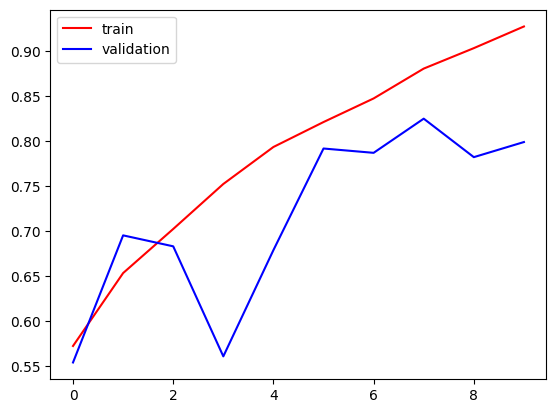

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

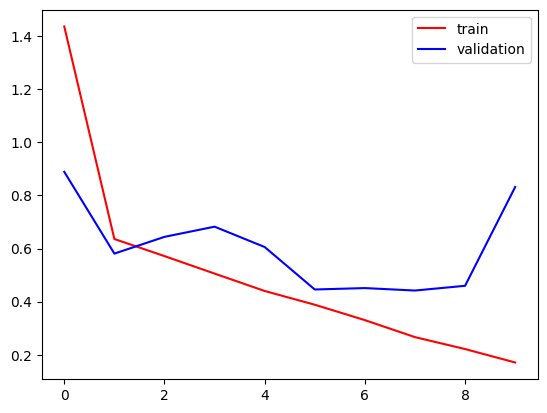

In [31]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#ways to reduce overfitting

#Add more data
#Data Augmentation
#L1/L2 Regularizer
#Dropout
#Batch Norm
#Reduce Complexity

In [34]:
pip install opencv-python


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 991.0 kB/s eta 0:00:40
   ---------------------------------------- 0.1/38.8 MB 1.1 MB/s eta 0:00:36
   ---------------------------------------- 0.2/38.8 MB 1.5 MB/s eta 0:00:26
   ---------------------------------------- 0.3/38.8 MB 1.7 MB/s eta 0:00:23
   ---------------------------------------- 0.5/38.8 MB 2.1 MB/s eta 0:00:19
    --------------------------------------- 0.6/38.8 MB 2.2 MB/s eta 0:00:18
    --------------------------------------- 0.8/38.8 MB 2.5 MB/s eta 0:00:16
    --------------------------------------- 0.9/38.8 MB 2.4 MB/s eta 0:00:16
   - -------------------------------------- 1.1/38.8 MB 2.6 MB/s eta 0:00:15
   - -------------------------------------- 1.2/38.8 MB 2.5 MB/s eta 0:00:15
   - -------------------------------------- 1.4/38.8 MB 2.8 MB/s eta 0:00:14
   - -----

In [35]:
pip install opencv-python-headless


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 1.4 MB/s eta 0:00:27
   ---------------------------------------- 0.2/38.8 MB 2.2 MB/s eta 0:00:18
   ---------------------------------------- 0.3/38.8 MB 2.0 MB/s eta 0:00:20
   ---------------------------------------- 0.5/38.8 MB 2.3 MB/s eta 0:00:17
    --------------------------------------- 0.7/38.8 MB 2.6 MB/s eta 0:00:15
    --------------------------------------- 0.8/38.8 MB 2.9 MB/s eta 0:00:14
    --------------------------------------- 1.0/38.8 MB 3.1 MB/s eta 0:00:13
   - -------------------------------------- 1.2/38.8 MB 3.3 MB/s eta 0:00:12
   - -------------------------------------- 1.2/38.8 MB 3.3 MB/s eta 0:00:12
   - -------------------------------------- 1.3/38.8 MB 2.9 MB/s eta 0:00:13
   - -------------------------------------- 1.5/38.8 MB 3.1 MB/s eta 0:00:12
   - --------

In [36]:
import cv2


In [37]:
test_img = cv2.imread('DogVsCat_Classifier/Dog.jpg')

In [39]:
import numpy as np
#Example of converting to a float array
test_img = np.array(test_img,dtype=np.float32)

In [50]:
from PIL import Image
import numpy as np

img = Image.open('Dog.jpg')
test_img = np.array(img, dtype=np.float32)


In [ ]:
#from PIL import Image
#import numpy as np

#img = Image.open('cat.jpg')
#test_img = np.array(img, dtype=np.float32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


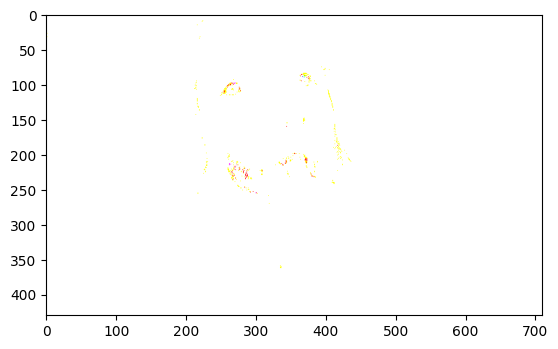

In [51]:
plt.imshow(test_img)

In [52]:
test_img.shape

(430, 710, 3)

In [53]:
test_img = cv2.resize(test_img,(256,256))

In [54]:
test_input = test_img.reshape((1,256,256,3))

In [56]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[1.]], dtype=float32)

In [ ]:
#1 indicates dog and 0 indicates cat